In [11]:
%pylab inline
import numpy as np
from skimage import io, color
from scipy.misc import imresize
from scipy.spatial.distance import cosine
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [12]:
df = pd.read_csv('../groundTruthTable.csv')
df.head(3)

,ref_images,cons_images
0,00093-7155-98_PART_1_OF_1_CHAL10_SF_4A21A50D.jpg,1479.jpg
1,53489-0146-01_PART_1_OF_1_CHAL10_SF_8021C06E.jpg,3227.jpg
2,60505-1308-01_PART_1_OF_1_CHAL10_SF_4F21A7DD.jpg,2505.jpg


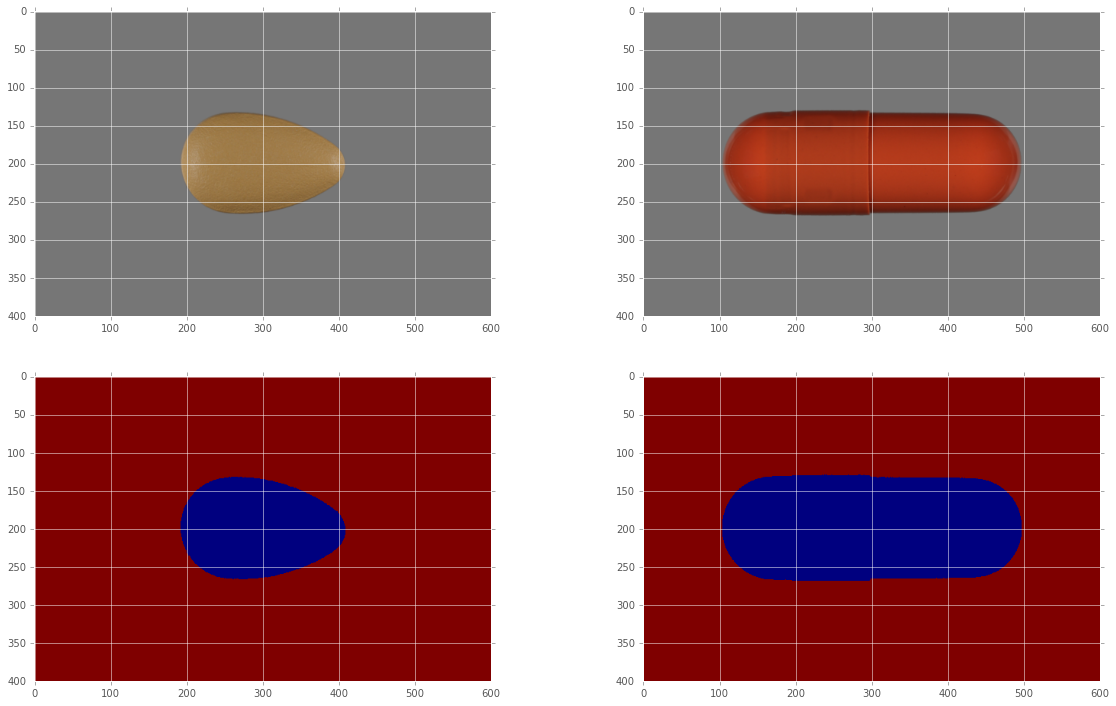

In [25]:
rgb1 = imresize(io.imread('./src/shape/test1.jpg'),.25)
rgb2 = imresize(io.imread('./src/shape/test2.jpg'),.25)
lab1 = color.rgb2lab(rgb1)
lab2 = color.rgb2lab(rgb2)
nz_mask1 =  lab1 < 1
nz_mask2 = lab2 <  1
nz_mask1 = nz_mask1[:,:,1]
nz_mask2 = nz_mask2[:,:,1]

fig = figure(figsize=(20,12))
ax = fig.add_subplot(2,2,1)
ax.imshow(rgb1)
ax = fig.add_subplot(2,2,2)
ax.imshow(rgb2)
ax = fig.add_subplot(2,2,3)
ax.imshow(nz_mask1)
ax = fig.add_subplot(2,2,4)
ax.imshow(nz_mask2)
maskout1 = np.zeros(nz_mask1.shape)
maskout2 = np.zeros(nz_mask1.shape)

In [26]:
nz_mask1.shape

(400, 600)

In [27]:
maskout1[nz_mask1 == False] = 255
maskout1[nz_mask1 == True] = 0
maskout2[nz_mask2 == False] = 255
maskout2[nz_mask2 == True] = 0

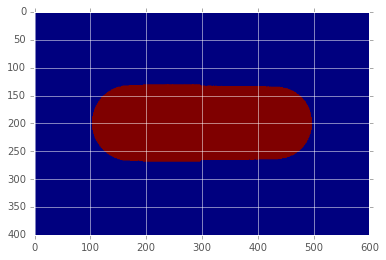

In [28]:
imshow(maskout2)

In [29]:
imsave('./color/test1.png',rgb1)
imsave('./color/test2.png',rgb2)
imsave('./color/mask1.png',nz_mask1)
imsave('./color/mask2.png',nz_mask2)

In [8]:
def colorhist2(img1,img2,mask1,mask2):
    style.use('ggplot')
    fig = figure(figsize=(15,6))
    ax = fig.add_subplot(1,2,1)
    h10 = ax.hist(img1[:,:,0][~mask1],bins=np.arange(0,256),color='red') 
    # ax = fig.add_subplot(1,3,2)
    h11 = ax.hist(img1[:,:,1][~mask1],bins=np.arange(0,256),color='blue')
    # ax = fig.add_subplot(1,3,3)
    h12 = ax.hist(img1[:,:,2][~mask1],bins=np.arange(0,256),color='green')

    ax = fig.add_subplot(1,2,2)
    h20 = ax.hist(img2[:,:,0][~mask2],bins=np.arange(0,256),color='red')
    # ax = fig.add_subplot(1,3,2)
    h21 = ax.hist(img2[:,:,1][~mask2],bins=np.arange(0,256),color='blue')
    # ax = fig.add_subplot(1,3,3)
    h22 = ax.hist(img2[:,:,2][~mask2],bins=np.arange(0,256),color='green') 
    return h10,h11,h12,h20,h21,h22

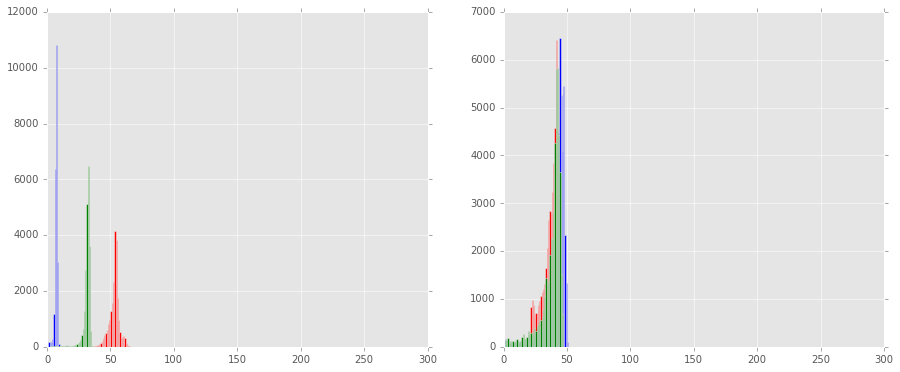

In [9]:
h10,h11,h12,h20,h21,h22 = colorhist2(lab1,lab2,nz_mask1,nz_mask2)

In [10]:
from colormath.color_diff import delta_e_cie2000
from colormath.color_objects import LabColor
L1 = np.argmax(h10[0])
a1 = np.argmax(h11[0])
b1 = np.argmax(h12[0])
L2 = np.argmax(h20[0])
a2 = np.argmax(h21[0])
b2 = np.argmax(h22[0])

c1 = LabColor(lab_l = L1,lab_a = a1, lab_b = a2)
c2 = LabColor(lab_l = L2,lab_a = a2,lab_b = b2)

delta_e_cie2000(c1,c2)


25.835807983080564

In [59]:
D0 = 1 - cosine(h10[0] / np.count_nonzero(nz_mask1) ,h20[0] / np.count_nonzero(nz_mask2))
D1 = 1 - cosine(h11[0] / np.count_nonzero(nz_mask1),h21[0] / np.count_nonzero(nz_mask2))
D2 = 1 - cosine(h12[0] / np.count_nonzero(nz_mask1),h22[0]/ np.count_nonzero(nz_mask2))
sum(h10[0]/ np.count_nonzero(nz_mask1))
color_score = D0 * D1 * D2
print color_score

0.00163793690697


In [6]:
D0 = 1 - cosine(h10[0],h20[0])
D1 = 1 - cosine(h11[0],h21[0])
D2 = 1 - cosine(h12[0],h22[0])
print D0,D1,D2

color_score = (D0 + D1 + D2)/3
print color_score

0.300917598512 0.0901340592367 0.0603893911933
0.150480349647


In [25]:
D0 = np.mean(np.abs(h10[0] - h20[0])) 
D1 = np.mean(np.abs(h11[0] - h21[0])) 
D2 = np.mean(np.abs(h12[0] - h22[0])) 
print D0,D1,D2
color_score = D0 * D1 * D2
print color_score

319.31372549 369.4 370.505882353
43702832.4676


In [41]:
clr1 = np.array([np.argmax(h10[0]),np.argmax(h11[0]),np.argmax(h12[0])])
print clr1

[158 123  72]


TypeError: float() argument must be a string or a number

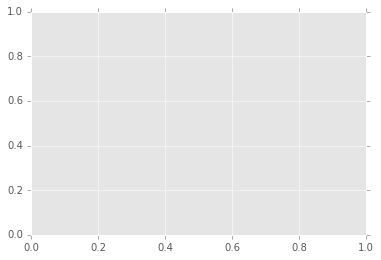

In [42]:
plot(h10[2])

In [43]:
x = np.zeros(10)

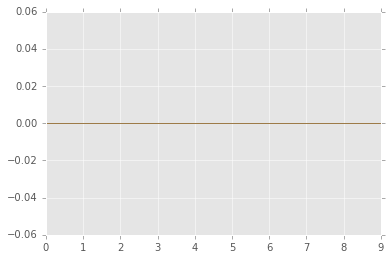

In [44]:
plot(x,color=clr1/256.)